**Instruction**
 - The full score is 110 but you will be graded out of 100
 - Work in your notebook.
 - Open book & Notes & Wolfram Alpha & Google etc. Grade will be given based on the fact that you have access to these. We do not value much on copy pasting skill. We value more on thought and reasoning process.
 - You are however not allowed to communicate to any intelligent being(if you cat is smart, no) or any LLM AI tools(ex: ChatGPT, copilot, codium etc.) regarding exam. This includes but not limited to asking questions on Chegg/Stack Overflow/Discord etc. 
 - Make sure your code works in order doing Kernel-->restart and then Cell--> Run All. Make sure what appears in the ouput is what you expect

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

<span style="font-size: 30px;color: green;">Easy Zone(60)</span>

Stuff you just need to copy pasted from the exercise.

# Problem 1) (10) Taylor

## Find first 3 **non-zero** terms taylor series expansion of
$$ f(x) = \sin\left(\frac{\pi}{2}+x\right) $$ around $x=0$.

$$
\approx 1 - \frac{x^2}{2} + \frac{x^4}{24}
$$

## Use it to estimate $\sin(\frac{25}{48}\pi)$ along with the bound on uncertainty. Anything sensible counts.

be careful with value of x

In [2]:
def taylor(x):
    return 1 - (x**2/2) + (x**4/24) # - (x**6/720) 

x = ((25/48)*np.pi) - (np.pi/2) # since pi/2 + x = 25/48pi
x2 = 1/48 * np.pi

print(taylor(x) == taylor(x2)) # checking if both are the same answer
guesstimate = taylor(x)
actual = np.sin((25/48) * np.pi)

print(f"guess = {guesstimate}, actual = {actual}, error = {abs(actual - guesstimate)}")

True
guess = 0.9978589233477692, actual = 0.9978589232386035, error = 1.09165676498435e-10


### Uncertainty bound up to the second degree term
Assuming that $x = \frac{\pi}{48}$ where we're doing around $x = 0$

$$
R_n(x) = \frac{f^{n+1}(c)}{(n+1)!} \cdot x^{n+1}
$$

$$
f^{3}(x) = sin(x) 
$$

$c$ should be in between 0 and $\frac{\pi}{48}$ the max value of $f^{3}(x)$ is $sin(\frac{\pi}{48}) \approx 0.065$ so the uncertainty bound is:

$$
\frac{0.065}{3!} \cdot (\frac{\pi}{48})^3 \approx 3.06 \cdot 10^{-6}
$$

So for sake of simplicity, i'll just say it is around $10^{-6}$. Checking with aforementioned code verifies that the Taylor approximation does stay within bounds of the actual answer.

# Problem 2) (10) Bisection

Find the solution to
$x-0.1=Ricatti(x)$ using bisection method make sure your answer has uncertainty less than $10^{-6}$.


Show somehow that you are sure that your answer is within the given uncertainty.

Note: this function is from the age where people love to put their name on solutions to differential equations.

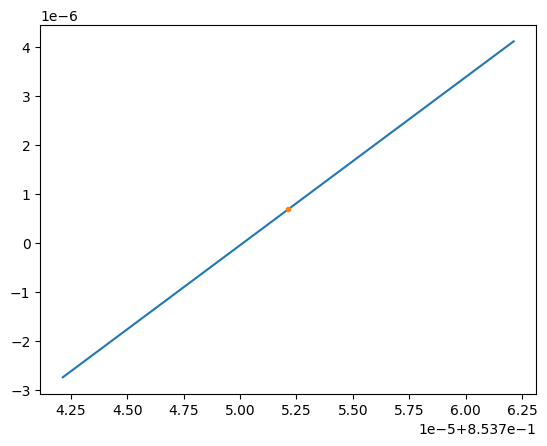

In [3]:
from scipy.special import riccati_jn
def riccati(x):
    return riccati_jn(1, x)[0][0]

def f(x): 
    return x - 0.1 - riccati(x)

def bisection(f, l, r, e) -> float: # f: function, l: left-bound, r: right-bound, e: error
    error = (r-l) / 2
    while error > e:
        guess = (l+r) / 2
        error = (r-l) / 2
        value = f(guess)

        if value == 0:
            return guess # exact solution
        elif value * f(l) < 0:
            r = guess
        elif value * f(r) < 0:
            l = guess

    return guess

guess = bisection(f, 0, 1, 10e-6)

# proof that answer is within uncertainty (i guess)

x_p = np.linspace(guess - 10e-6, guess + 10e-6, 100)
plt.plot(x_p, [f(x) for x in x_p])
plt.plot(guess, f(guess), '.')

# print(riccati(0.5), riccati(0.9)) # this is how you call it.

# Problem 3) Newton's method (10)

**Write down the update rule(with analytic derivative) $x_{n+1} = ... $** for solving
$$
    x = \exp(x) + \sin(x)
$$
Note: I want the update explicit analytical (no numerical derivative) update rule not the final number.

Converting $f(x)$ to the format required for Newton/bisection...
$$
f(x) = x - e^x - sin(x) \qquad
f'(x) = 1 - e^x - cos(x)
$$
Newton method's update rule is:
$$
x_{n+1} = x_n + \frac{f(x)}{f'(x)} 
$$
so:
$$
x_{n+1} = x_n + \frac{x - e^x - sin(x)}{1 - e^x - cos(x)}
$$

# Problem 4) Numerical Calculus (10)

## Compute the Numerical Derivative of
$$
f(x) = Airy(\sin(x))
$$
plot for $x = 0.1 ... \pi$

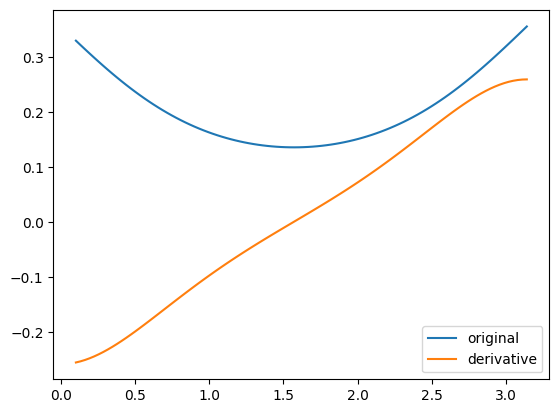

In [4]:
from scipy.special import airy
# this is how you compute airy(0.5)
# print(airy(0.5)[0])

def f(x):
    return airy(np.sin(x))[0]

def cfd(f, h): # centered first derivative for numerical differentation
    def ret(x):
        return (f(x+h) - f(x-h)) / (2*h)
    return ret

fp = cfd(f, 0.0001) # some small h value

xs = np.linspace(0.1, np.pi, 100)
ys = f(xs)
ys_fp = fp(xs)

plt.plot(xs, ys, label='original')
plt.plot(xs, ys_fp, label='derivative')

plt.legend()


## Compute the following integral using trapezoid rule

$$
\int_0^1 x^2 e^{-x} dx
$$
use 100 pieces for your integral

In [5]:
def trapezoid(f, a, b, n):
    interval = (b-a) / n
    return sum([f(a + (i*interval))*interval for i in range(1, n)]) + ((interval/2)*(f(a)+f(b)))

def f(x):
    return x**2*np.exp(-x)

float(trapezoid(f, 0, 1, 100))

0.16060585972657476

# Problem 5) Fit the curve (10)

Find the best least square parameter of fitting the given data with

$$
y = a + b \sin(2x) + c \sin(x)
$$

Plot to show me that you got the right curve.

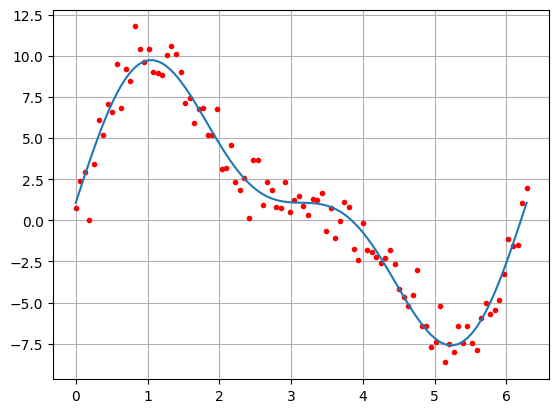

In [6]:
xs = np.linspace(0,2*np.pi, 100)
ys = np.array([ 7.75188362e-01,  2.38957935e+00,  2.90870281e+00,  9.25427988e-03,
        3.41095099e+00,  6.10447447e+00,  5.20831469e+00,  7.09523839e+00,
        6.59457036e+00,  9.47143556e+00,  6.83052978e+00,  9.16500874e+00,
        8.46344207e+00,  1.17797368e+01,  1.03881312e+01,  9.59432672e+00,
        1.04224181e+01,  9.00125371e+00,  8.98149954e+00,  8.83869019e+00,
        1.00703144e+01,  1.05886021e+01,  1.00974137e+01,  9.03911773e+00,
        7.15157780e+00,  7.40442191e+00,  5.94108687e+00,  6.77255406e+00,
        6.83059945e+00,  5.20065818e+00,  5.18911000e+00,  6.75721914e+00,
        3.13152318e+00,  3.17009873e+00,  4.56093625e+00,  2.34054214e+00,
        1.86835210e+00,  2.54694827e+00,  1.45055337e-01,  3.65375605e+00,
        3.66678213e+00,  9.34657731e-01,  2.30194909e+00,  1.84050671e+00,
        8.12742088e-01,  7.44480539e-01,  2.33711833e+00,  5.29160871e-01,
        1.25236400e+00,  1.47849883e+00,  8.80654100e-01,  2.98725167e-01,
        1.27974671e+00,  1.26181773e+00,  1.68121179e+00, -6.38636123e-01,
        7.54378257e-01, -1.08942416e+00, -4.49998888e-02,  1.11081134e+00,
        8.26775043e-01, -1.75385843e+00, -2.39043402e+00, -1.73803915e-01,
       -1.80772091e+00, -1.94571367e+00, -2.20992140e+00, -2.59282538e+00,
       -2.26697765e+00, -1.79693816e+00, -2.65712409e+00, -4.19882952e+00,
       -4.64395764e+00, -5.20621122e+00, -4.53854192e+00, -3.02333470e+00,
       -6.42147624e+00, -6.41481073e+00, -7.68695162e+00, -7.37521112e+00,
       -5.19332350e+00, -8.64277001e+00, -7.53219568e+00, -8.00443234e+00,
       -6.44939434e+00, -7.42960525e+00, -6.41302130e+00, -7.43481195e+00,
       -7.89956470e+00, -5.95517440e+00, -5.00535520e+00, -5.70875794e+00,
       -5.42890302e+00, -4.86409028e+00, -3.25641674e+00, -1.12623535e+00,
       -1.55442619e+00, -1.47526046e+00,  1.07220491e+00,  1.99052001e+00])

def best_fit(xs, ys):
    n = len(xs)
    A = np.array([[n, np.sum(np.sin(2*xs)), np.sum(np.sin(xs))],
                  [np.sum(np.sin(2*xs)), np.sum((np.sin(2*xs))**2), np.sum(np.sin(2*xs)*np.sin(xs))],
                  [np.sum(np.sin(xs)), np.sum(np.sin(2*xs)*np.sin(xs)), np.sum((np.sin(2*xs))**2)]])
    B = np.array([np.sum(ys), np.sum(ys * np.sin(2*xs)), np.sum(ys * np.sin(xs))])
    a, b, c = np.linalg.solve(A, B)
    return a, b, c

a, b, c = best_fit(xs, ys)
xs_p = np.linspace(0, max(xs), 100)
ys_p = a + (b*np.sin(2*xs_p)) + (c*np.sin(xs_p))
plt.plot(xs, ys, '.r')
plt.plot(xs_p, ys_p)
plt.grid()

<span style="font-size: 30px;color: red">Some Thought are Required  Zone (50)</span>

# Problem 6)  (25)

**The Great Crypto Whale Hunt** 🐋💰 
Can you outtrade the whale before the bubble bursts? 🚀🔥 (For those who don't know just search for crypto whale, it means those who whole large enough crypto coins to manipulate market(story for another day on how to do that hahaha))

You are the mastermind behind a top-secret hedge fund, always staying one step ahead of the market. After months of research, you've cracked the code—meme coin prices follow the formula (before the crash):  

$$
P(t) = a e^t + b t^2 + c
$$
Where $t$ is the time in seconds since launch. You've collected some prices data points in the first 2 seconds to estimate the parameters to the model.

But.... here’s the catch: you intercepted a secret radio transmission—an infamous cryptowhale plans to dump their entire stash when the price hits **$200**!. You can easily ride the meme coin wave and dump all the coins before the other person to get really rich.

Your mission: **Calculate the exact moment the price reaches $200 and front-run the whale!** 🏎️📉  

4.007224071486313 4.007224082946777
200.00000000000358 200.00000089716116


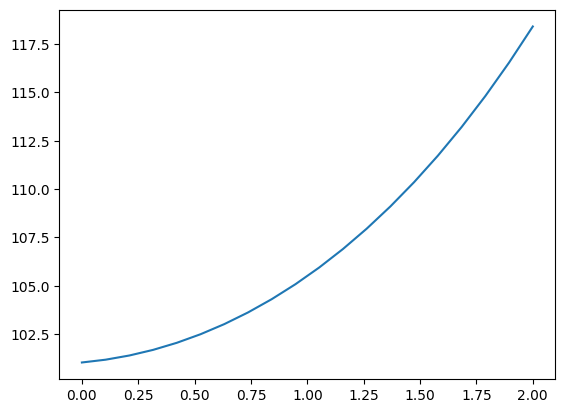

In [7]:
ts = np.linspace(0,2,20)
prices = np.array([101.03      , 101.17424993, 101.39102495, 101.68173384,
       102.04794176, 102.49138758, 103.01400321, 103.617935  ,
       104.30556758, 105.07955023, 105.94282634, 106.89866603,
       107.95070239, 109.10297182, 110.35995875, 111.7266454 ,
       113.20856704, 114.81187336, 116.5433967 , 118.41072778])
plt.plot(ts, prices) # yes it's not 200 yet but it will be soon.

def best_sell(xs, ys):
    n = len(xs)
    A = np.array([
        [np.sum(np.exp(2*xs)), np.sum(np.exp(xs)*xs**2), np.sum(np.exp(xs))],
        [np.sum(np.exp(xs)*xs**2), np.sum(xs**4), np.sum(xs**2)],
        [np.sum(np.exp(xs)), np.sum(xs**2), n]
    ])
    B = np.array([np.sum(ys*np.exp(xs)), np.sum(ys*xs**2), np.sum(ys)])
    a, b, c = np.linalg.solve(A, B)
    return a, b, c

a, b, c = best_sell(ts, prices)

def price_func(x):
    return (a*np.exp(x)) + (b*x**2) + c 

def price_func_bs(x):
    return (a*np.exp(x)) + (b*x**2) + c - 200 # since we want price to be 200

def price_func_derivative(x):
    return (a*np.exp(x)) + (2*b*x)

def newton(f, fp, x, n): 
    for i in range(n):
        x = x - (f(x) / fp(x))
    return x

def bisection(f, l, r, e) -> float: # f: function, l: left-bound, r: right-bound, e: error
    error = (r-l) / 2
    while error > e:
        guess = (l+r) / 2
        error = (r-l) / 2
        value = f(guess)

        if value == 0:
            return guess # exact solution
        elif value * f(l) < 0:
            r = guess
        elif value * f(r) < 0:
            l = guess

    return guess

guess_newton = newton(price_func_bs, price_func_derivative, 10, 10)
guess_bisection = bisection(price_func_bs, 2, 10, 1e-6)

print(guess_newton, guess_bisection)

print(price_func(guess_newton), price_func(guess_bisection)) # double checking, they both yield approximately 200 so it should be correct.

Answer using Newton method (10 times, start at t = 10): **4.007224071486313** 

Answer using bisection (bound is 2 to 10, error is 10e-6): **4.007224082946777**

They're about the same, so I'll use the bisection answer to determine that we should sell at ~$t = 4.007224082946777$ to front-run the whale. For sake of simplicity that's basically four seconds.

# Problem 7) Valentines. (25)

Ryuuji, a geeky guy, wants to send an heart equation to Taiga(his girlfriend) for valentines day\*\*. However, he want to embed a secret message in what he will be sending.

He has investigated the equation shown below to make a heart. The equation below will make a heart for most value of parameter $a$ (try change it but don't go too crazy\*). The message he wants to embed is the day they first met encoded in the form of area of the heart.

Since they first met in 13th November. Help Ryuuji find $a$ that the total area is 13.11. (I made that up though.... not correct according to the anime for sure)


You will need to figure out a couple components in here. Here are some hints that may or may not help you as there are multiple ways to do this.
- What's the width of the heart? (notice how i plot it)
    - I noticed that max width is $2a$
- Wouldn't it be nice if the joint between the two colors is exactly at zero?
    - Added $-a^{\frac{2}{3}}$ to each of the equations to move the heart down
- I guarantee you that for the heart with the correct secret message, the top dip does not dip below the two blue sides.

\* \* Ref: a really old but very good anime called [Toradora!](https://myanimelist.net/anime/4224/Toradora) recommended for binge watch.)

\* I know whatever I say... you will take that as a challenge and do it anyway.....

a should be approximately 2.042814016342163
13.109990892863127


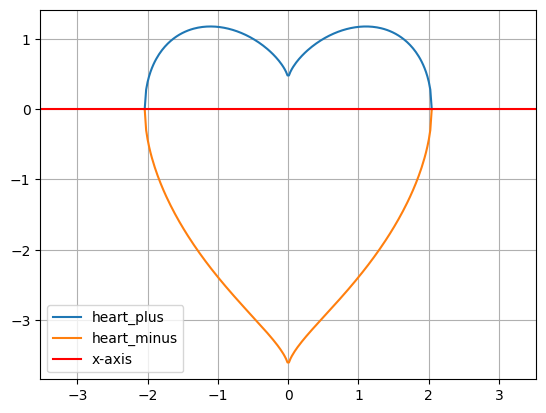

In [8]:
def heart_plus(a, x):
    return np.sqrt(a**2-x**2) + np.power(x**2, 1/3) - np.power(a**2, 1/3)

def heart_minus(a, x):
    return -np.sqrt(a**2-x**2) + np.power(x**2, 1/3) - np.power(a**2, 1/3) # added the last part to make sure tips touch at y = 0

def area_func(a, x):
    return heart_plus(a, x) - heart_minus(a, x)

def bisection(f, l, r, e) -> float: # f: function, l: left-bound, r: right-bound, e: error
    error = (r-l) / 2
    while error > e:
        guess = (l+r) / 2
        error = (r-l) / 2
        value = f(guess)

        if value == 0:
            return guess # exact solution
        elif value * f(l) < 0:
            r = guess
        elif value * f(r) < 0:
            l = guess

    return guess

def trapezoid_valentine(f, a, b, n):
    interval = (b-a) / n
    return sum([f(b, a + (i*interval))*interval for i in range(1, n)]) + ((interval/2)*(f(b, a)+f(b, b)))

def solve(a):
    return 13.11 - (2 * trapezoid_valentine(area_func, 0, a, 1000))

guess = bisection(solve, 0, 3, 1e-6)

a = guess
xs = np.linspace(-a, a, 200)
ys = [heart_plus(a, x) for x in xs]
plt.plot(xs, ys, label='heart_plus')
xs = np.linspace(-a, a, 200)
ys = [heart_minus(a, x) for x in xs]
plt.plot(xs, ys, label='heart_minus')

plt.axhline(0, label='x-axis', color='r')

plt.legend()
plt.grid()
plt.axis('equal')

print(f"a should be approximately {guess}")

the_area = 2 * trapezoid_valentine(area_func, 0, guess, 1000)
print(the_area) # should be around 13.11